## 测试GP-SMOTE

t-SNE可视化图片已保存至: ./tsne_results_1208/iris0\iris0.png
第 1 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
第 2 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
第 3 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
第 4 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
t-SNE可视化图片已保存至: ./tsne_results_1208/iris0\iris0_dss.png
t-SNE可视化图片已保存至: ./tsne_results_1208/wisconsin\wisconsin.png
第 1 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
第 2 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
第 3 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
第 4 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
第 5 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿中个体数： 0 合成实例数： 10
第 6 轮合成
########### 	 Start the evolution! 	 ##########
可行解数量： 0 前沿

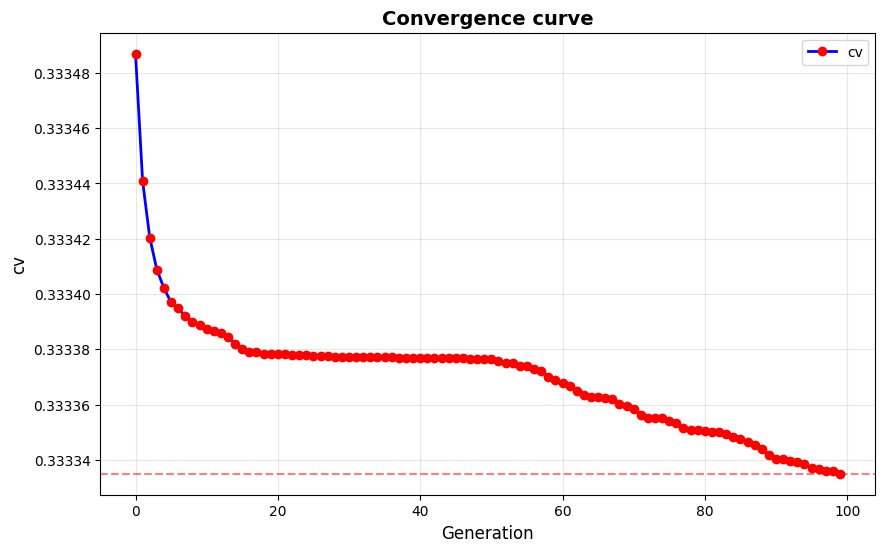

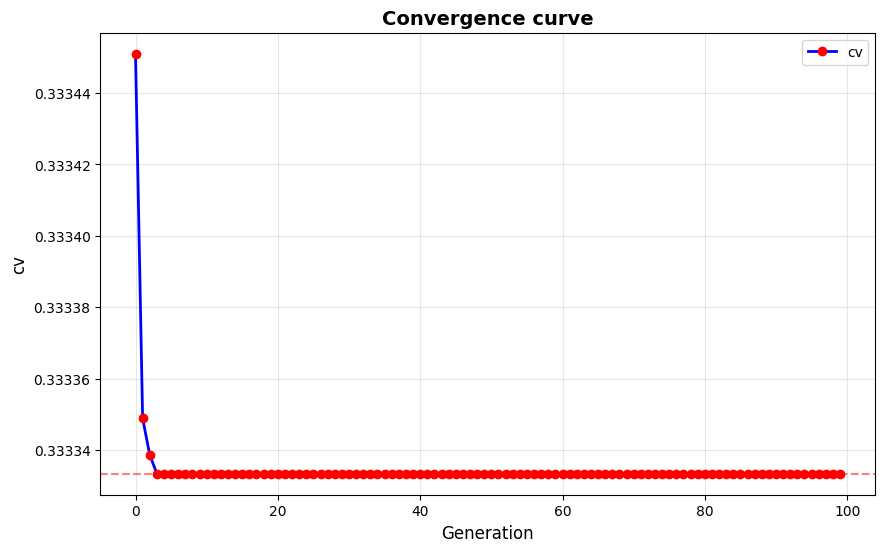

In [3]:
from data_preprocess import data_loader, data_preprocess
from sklearn.preprocessing import StandardScaler
from visualize import tsne_visualization_binary
from config import EvolutionaryParameterConfig
from gp_smote import DSSMOTE
import numpy as np
import warnings

warnings.filterwarnings("ignore")  # 忽略警告

file_path = '../datasets/dat/'
save_path = './tsne_results_1208/'
datasetnames = ['iris0', 'ecoli1', 'glass0', 'glass1', 'haberman', 'pima', 'segment0', 'vowel0', 'wisconsin', 'yeast1']
datasetnames = ['iris0', 'wisconsin']
if __name__ == '__main__':
    for datasetname in datasetnames:
        X, y = data_loader(file_path + datasetname + '.dat')
        with open('../log.txt', 'a') as f:
            print(f'数据集：{datasetname}', file=f)
            print(f'实例数量：{X.shape[0]}', file=f)
            print(f'特征数量：{X.shape[1]}', file=f)

        X_train, X_test, y_train, y_test = data_preprocess(X, y, standard=False, random_state=42)

        standard = StandardScaler()
        # 使用t-SNE进行降维
        X_tsne = tsne_visualization_binary(StandardScaler().fit_transform(X_train), y_train,
                                           save_path=save_path + datasetname,
                                           filename=datasetname, perplexity=30)  # 传入的是标准化后的特征数据

        evol_parameter = EvolutionaryParameterConfig(30, 0.8, 0.2, 100, False)

        dss = DSSMOTE(X=X_train, y=y_train, evol_parameter=evol_parameter)
        X_syn, y_syn = dss.fit_resample_synthesis_only()
        # 可视化
        y_syn = [2 for _ in range(len(y_syn))]
        X_train_resampled = np.vstack((X_train, X_syn))
        y_train_resampled = np.hstack((y_train, y_syn))
        # 4. 使用t-SNE进行降维
        X_tsne_resampled_p_a = tsne_visualization_binary(StandardScaler().fit_transform(X_train_resampled),
                                                         y_train_resampled,
                                                         save_path=save_path + datasetname,
                                                         filename=datasetname + '_dss', perplexity=30)
        dss.curve_fitting(save_path + datasetname + '/', 'evolutionary')
